In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Text(0.5, 0, 'Min and max temperature')

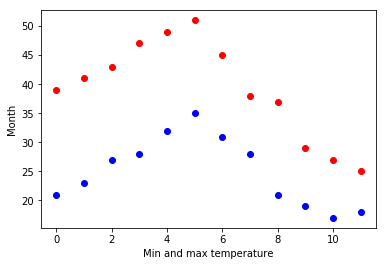

In [2]:
temperature_maximum = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temperature_minimum = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(12)
plt.plot(months, temperature_maximum, 'ro')
plt.plot(months, temperature_minimum, 'bo')
plt.ylabel('Month')
plt.xlabel('Min and max temperature')


In [4]:
#fitting it to the periodic function
from scipy import optimize
def yeartemperatures(times, avg, ampl, time_offset):
    return (avg 
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yeartemperatures, months,
                                      temperature_maximum, [40,20,0])
res_min, cov_min = optimize.curve_fit(yeartemperatures, months,
                                      temperature_minimum, [-40, 20, 0])

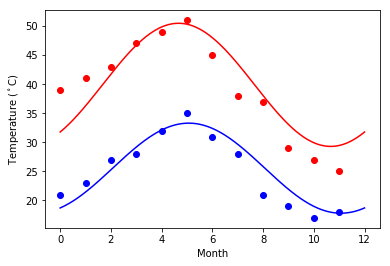

In [5]:
# plot the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temperature_maximum, 'ro')
plt.plot(days, yeartemperatures(days, *res_max), 'r-')
plt.plot(months, temperature_minimum, 'bo')
plt.plot(days, yeartemperatures(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

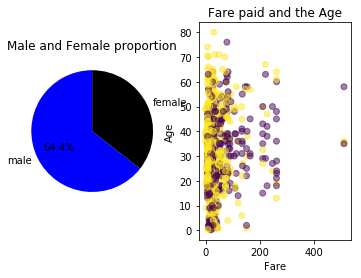

In [9]:
url=r'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url,skip_blank_lines=True)

#1. Create a pie chart presenting the male/female proportion
count=titanic['sex'].value_counts()
colors = ['blue', 'black']
f, (axis1, axis2) = plt.subplots(1, 2)
axis1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
axis1.set_title('Male and Female proportion')

#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


axis2.set_xlabel('Fare')
axis2.set_ylabel('Age')
axis2.set_title('Fare paid and the Age')
axis2.scatter(titanic['fare'], titanic['age'], c= pd.factorize(titanic['sex'])[0], alpha=0.5)